The dataset taken from Kaggel is Iris. It is a classification problem as the output is discrete/categorical i.e. there are three types of species defined - virginica, setosa, versicolor.

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/iris
!unzip iris.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
iris.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  iris.zip
replace Iris.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: Iris.csv                
replace database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: database.sqlite         


In [5]:
data = pd.read_csv('Iris.csv')

# Preprocessing
# Dropped unnecessary columns
if 'Id' in data.columns:
    data = data.drop('Id', axis=1)

print(data.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [8]:
#categorical column to numerical
label_encoder = LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

In [9]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


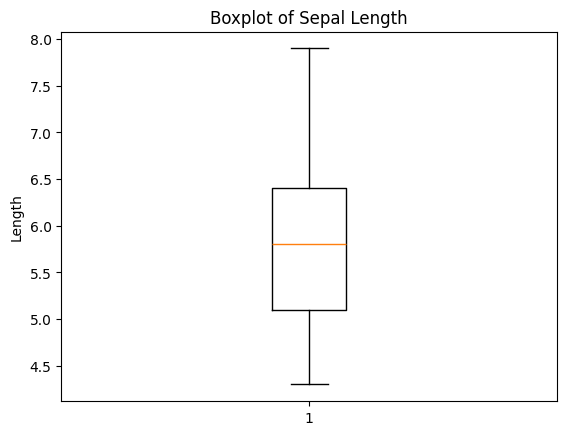

In [18]:
plt.boxplot(data['SepalLengthCm'])
plt.title('Boxplot of Sepal Length')
plt.ylabel('Length')
plt.show()

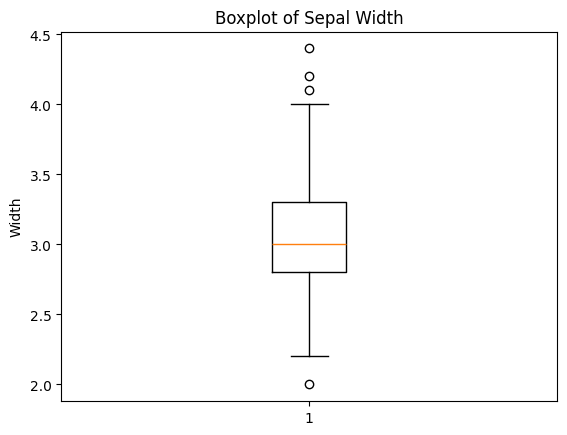

In [19]:
plt.boxplot(data['SepalWidthCm'])
plt.title('Boxplot of Sepal Width')
plt.ylabel('Width')
plt.show()

Viewing the plot of Sepal Width, some outliers have been obseeved in this column only

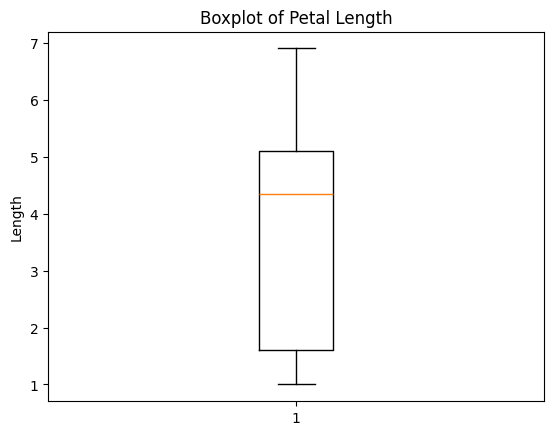

In [20]:
plt.boxplot(data['PetalLengthCm'])
plt.title('Boxplot of Petal Length')
plt.ylabel('Length')
plt.show()

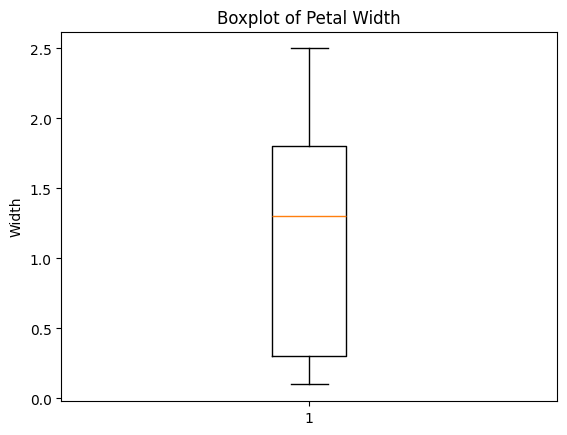

In [21]:
plt.boxplot(data['PetalWidthCm'])
plt.title('Boxplot of Petal Width')
plt.ylabel('Width')
plt.show()

In [10]:
X = data.drop(data.filter(like='Species').columns, axis=1)
y = data['Species']

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_cv, y_test, y_cv = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(model, X_cv, y_cv, cv=5)
y_pred = model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Cross-validation scores: [1.  0.6 1.  1.  1. ]
Mean cross-validation score: 0.9199999999999999

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



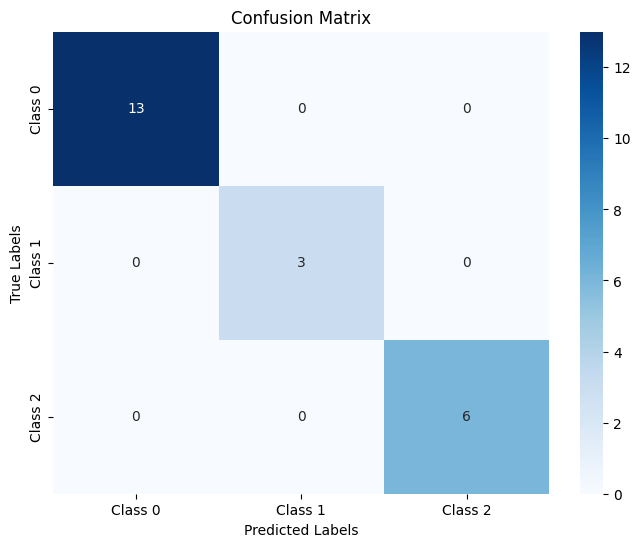

In [17]:
# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()